<left><img src="https://i.ibb.co/zWjkHsWJ/marca-final-rgb-campanha-2025-versao02.png" width="35%" height="35%"></left>

# Tópicos em Matemática Aplicada: Deep Learning (Aula 04)

**Exemplo 01**

Data: 11/set/25


---

# Introdução ao Pytorch: MNIST

**Objetivos:**
1.  Entender o que é o PyTorch e por que ele é tão utilizado.
2.  Aprender sobre **Tensors**, a estrutura de dados fundamental.
3.  Usar o **Autograd** para calcular gradientes automaticamente.
4.  Carregar dados de forma eficiente com `Dataset` e `DataLoader`.
5.  Construir, treinar e avaliar uma rede neural para classificar imagens.
6.  Analisar os resultados com uma **Matriz de Confusão**.

---

### **Ação Necessária: Habilitar a GPU**
Para acelerar nosso treinamento, vamos usar uma GPU gratuita do Colab.
Vá no menu e selecione:

`Runtime` -> `Change Runtime Type` -> `T4 GPU`

---

## O que é o PyTorch?

**PyTorch** é uma biblioteca de código aberto para Machine Learning baseada na biblioteca Torch, desenvolvida principalmente pelo laboratório de pesquisa em IA do Facebook (Meta AI). Lançado em 2016, ele rapidamente se tornou um dos favoritos da comunidade de pesquisa e da indústria.

**Por que o PyTorch se tornou tão popular?**

1.  Intuitiva:** Sua sintaxe é muito parecida com a do Python e do NumPy, o que o torna fácil de aprender e usar. Você sente que está escrevendo Python, não aprendendo uma linguagem nova.

2.  **Grafo Computacional Dinâmico (Define-by-Run):** Diferente de frameworks mais antigos (como as primeiras versões do TensorFlow), o PyTorch constrói o grafo de computação em tempo real, à medida que o código é executado. Isso torna o *debugging* (depuração) incrivelmente mais simples. Você pode usar `print()` ou um depurador Python padrão para inspecionar qualquer tensor em qualquer ponto do código.

3.  **Flexibilidade para Pesquisa:** O grafo dinâmico permite a criação de modelos complexos com estruturas de controle (como laços `for` e condicionais `if` que dependem dos dados), o que é um grande atrativo para aqueles que exploram novas arquiteturas.

4.  **Ecossistema Robusto:** Possui bibliotecas consolidadas e importantes como `torchvision` (para visão computacional), `torchaudio` (para áudio) e `torchtext` (para processamento de linguagem natural), que vêm com datasets, modelos pré-treinados e transformações de dados prontas para uso.

Em resumo, PyTorch combina simplicidade e poder, tornando-o uma excelente escolha tanto para iniciantes quanto para especialistas.

### Passo 1: Imports e Configuração do Dispositivo

Vamos começar importando as bibliotecas que usaremos. A linha mais importante aqui é a que define o `device`. Este pequeno trecho de código verifica se uma GPU (`cuda`) está disponível no ambiente do Colab. Se estiver, ele instrui o PyTorch a usar a GPU; caso contrário, usará a CPU. Executar operações em uma GPU pode ser centenas de vezes mais rápido.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim # importa os otimizadores
from torch.utils.data import DataLoader
from torchvision import datasets, transforms # importa os datasets que usaremos
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ponto chave: verifica se a GPU está disponível e a define na variável 'device'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Usando o dispositivo: cuda


### Passo 2: Tensors - A Linguagem Universal do Deep Learning

Tudo no PyTorch é baseado em **Tensores**. Superficialmente, um tensor é apenas uma estrutura de dados N-dimensional, muito parecida com os arrays do NumPy. Um escalar (um único número) é um tensor de 0 dimensões, um vetor é um tensor de 1 dimensão, uma matriz é um tensor de 2 dimensões, e assim por diante.

**Mas por que eles são a base de tudo em Deep Learning?**

A resposta está em como as redes neurais funcionam: elas são, em essência, uma série de operações matemáticas aplicadas a dados numéricos. Os tensores fornecem uma forma unificada e eficiente de representar tanto os dados quanto as operações.

1.  **Representação Unificada de Dados:** Não importa qual é o seu dado de entrada (uma imagem, uma frase, um vídeo ou uma tabela), ele precisa ser convertido para um formato numérico que a rede possa processar. Os tensores são esse formato.
    *   **Uma imagem** se torna um tensor 3D: `(altura, largura, canais de cor)`.
    *   **Um lote de imagens** se torna um tensor 4D: `(tamanho_do_lote, altura, largura, canais)`. No nosso exemplo de hoje, do MNIST, será `[128, 1, 28, 28]`.
    *   **Texto** é convertido em vetores numéricos (incorporações, ou embeddings), resultando em um tensor 2D: `(numero_de_palavras, dimensao_do_embedding)`.

2.  **Parâmetros do Modelo são Tensores:** Como já vimos, o conhecimento que uma rede neural aprende durante o treinamento é armazenado em seus **pesos (weights)** e **vieses (biases)**. Adivinhe o que eles são? Tensores, como vimos na última aula! Uma camada linear (`nn.Linear(784, 128)`) nada mais é do que uma matriz de pesos (um tensor 2D de dimensão `[128, 784]`) e um vetor de viés (um tensor 1D de dimensão `[128]`).

3.  **Computação Otimizada para GPUs:** A operação fundamental em redes neurais é a multiplicação de matrizes (tensores 2D), seguida por adições e ativações. Essas operações são altamente paralelizáveis, o que significa que muitos cálculos pequenos e independentes podem ser executados ao mesmo tempo. As **GPUs (Unidades de Processamento Gráfico)** são projetadas exatamente para isso. Ao representar tudo como tensores, o PyTorch pode enviar esses dados e operações para a GPU, realizando cálculos massivos em uma fração do tempo que uma CPU levaria.

Concluímos que tudo que é processado no deep learning (os dados de entrada, os pesos do modelo e os resultados intermediários) são tensores. Eles são a linguagem que permite que os dados fluam através da rede e que os cálculos sejam executados de forma extremamente rápida.

Abaixo vamos criar alguns na prática para ver como funcionam.

In [ ]:
# Criação de um tensor a partir de uma lista Python
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print("Tensor x:\n", x)
print("Shape (formato) de x:", x.shape)

# Tensores comuns: zeros, ones, randn (distribuição normal)
rands = torch.randn((2, 3))
print("\nTensor de números aleatórios:\n", rands)

# Operações são feitas elemento a elemento
soma = x + rands
print("\nSoma (x + rands):\n", soma)

# Multiplicação de matrizes (essencial em Deep Learning)
a = torch.randn(5, 3)
b = torch.randn(3, 4)
c = a @ b # O operador @ é um atalho para torch.matmul
print("\nShape da multiplicação de matrizes:", c.shape)

# Mover um tensor para a GPU é simples com o método .to()
if torch.cuda.is_available():
    x_gpu = x.to(device)
    print("\nDevice do tensor x_gpu:", x_gpu.device)

Tensor x:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape (formato) de x: torch.Size([2, 3])

Tensor de números aleatórios:
 tensor([[ 0.6612, -0.4945, -0.4624],
        [ 1.0196,  1.0126, -1.7958]])

Soma (x + rands):
 tensor([[1.6612, 1.5055, 2.5376],
        [5.0196, 6.0126, 4.2042]])

Shape da multiplicação de matrizes: torch.Size([5, 4])

Device do tensor x_gpu: cuda:0


### Passo 3: Autograd - O Sistema de Gradientes Automático

Esta é uma das principais funções por trás do PyTorch. Para treinar uma rede neural, precisamos calcular o gradiente da função de perda em relação a cada peso do modelo, como vimos previamente, para realizar o backpropagation.

O PyTorch faz isso para nós! Se um tensor for criado com o parâmetro `requires_grad=True`, o PyTorch rastreia todas as operações feitas com ele. Depois, quando chamamos `.backward()` em um resultado (como a perda), ele calcula automaticamente os gradientes e os armazena no atributo `.grad` dos tensores originais.

In [ ]:
# Criamos um tensor e definimos requires_grad=True para rastrear as operações
w = torch.tensor([2.0, 3.0, 1.0], requires_grad=True)

# Definimos uma função simples: y = 2*w[0]^2 + w[1]
y = 2 * w[0]**2 + w[1]
print("Resultado y:", y)

# Calculamos os gradientes de y em relação a w
y.backward()

# Os gradientes (dy/dw) são armazenados no atributo .grad
# dy/dw0 = 4*w[0] = 4*2 = 8
# dy/dw1 = 1
# dy/dw2 = 0 (pois w[2] não afeta y)
print("Gradientes (dy/dw):", w.grad)

Resultado y: tensor(11., grad_fn=<AddBackward0>)
Gradientes (dy/dw): tensor([8., 1., 0.])


### Passo 4: Preparando os Dados com `Dataset` e `DataLoader`

Para treinar um modelo, precisamos de dados. O PyTorch nos oferece duas ferramentas poderosas para isso:
- `Dataset`: Uma classe abstrata que representa nosso conjunto de dados. `torchvision` já vem com datasets conhecidos, como o MNIST, prontos para uso.
- `DataLoader`: Pega um `Dataset` e o transforma em um iterador que nos fornece os dados em lotes (*batches*), embaralha os dados a cada época e pode usar processos paralelos para carregar os dados mais rápido.

Vamos usar o dataset MNIST, que contém imagens de dígitos escritos à mão (0 a 9).

### O que é e onde definimos o tamanho do lote (`batch_size`)?


**Por que usamos lotes em vez de treinar com uma imagem de cada vez ou com todas de uma vez?**

1.  **Eficiência Computacional:** Processar uma imagem por vez é ineficiente, pois não aproveita a capacidade de paralelismo das GPUs. Processar todas as 60.000 imagens de uma vez (o que é chamado de *batch gradient descent*) exigiria uma quantidade enorme de memória RAM/VRAM, tornando o processo inviável para a maioria dos datasets.

2.  **Generalização e Estabilidade:** Os mini-lotes (*mini-batches*, nosso caso) oferecem um equilíbrio perfeito. A média dos gradientes calculada sobre um lote (ex: 128 imagens) é uma estimativa muito mais estável e menos "ruidosa" do que o gradiente de uma única imagem. Isso ajuda o treinamento a convergir de forma mais suave e, muitas vezes, leva o modelo a aprender padrões mais gerais (melhor generalização), em vez de se ajustar excessivamente aos detalhes de cada exemplo individual.

No código abaixo, ao criar o `DataLoader`, você verá o parâmetro `batch_size=128`. É aqui que definimos quantas imagens o modelo verá antes de atualizar seus pesos.

Portanto, `batch_size` é um **hiperparâmetro** crucial: um valor muito pequeno pode tornar o treino instável, enquanto um valor muito grande pode exigir muita memória e levar a uma convergência mais lenta ou a um mínimo local ruim.



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.99MB/s]


Shape do lote de imagens: torch.Size([128, 1, 28, 28])
Shape do lote de rótulos: torch.Size([128])


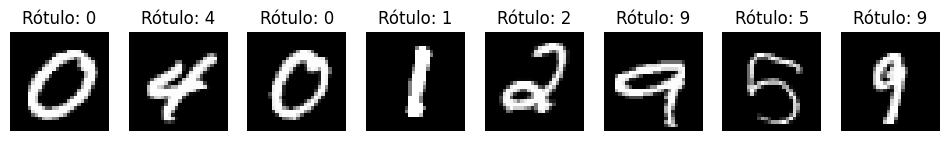

In [ ]:
# `transforms.ToTensor()` converte as imagens (formato PIL/Pillow) para Tensores
# e normaliza os pixels de [0, 255] para [0.0, 1.0]
transform = transforms.ToTensor()

# Baixar o dataset de treino (download=True faz o download na primeira vez)
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Baixar o dataset de teste
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Criar os DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

# Vamos dar uma olhada em um lote de dados
images, labels = next(iter(train_loader))
print("Shape do lote de imagens:", images.shape) # [batch_size, canais, altura, largura]
print("Shape do lote de rótulos:", labels.shape)

# Visualiza algumas imagens
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i, ax in enumerate(axes):
    ax.imshow(images[i].squeeze(), cmap="gray")
    ax.set_title(f"Rótulo: {labels[i].item()}")
    ax.axis("off")
plt.show()

## Verificando o dataset

In [ ]:
# Os objetos Dataset do PyTorch funcionam com a função len() do Python.
num_train_images = len(train_dataset)
num_test_images = len(test_dataset)

print(f"Número de imagens no conjunto de treino: {num_train_images}")
print(f"Número de imagens no conjunto de teste: {num_test_images}")

# Da mesma forma, podemos usar len() no DataLoader para ver quantos lotes ele irá gerar.
# Isso é simplesmente: (total de imagens / tamanho do lote), arredondado para cima.
num_train_batches = len(train_loader)
num_test_batches = len(test_loader)

print(f"Tamanho do lote (batch_size): {train_loader.batch_size}")
print(f"Número de lotes de treino: {num_train_batches} (Cálculo: {num_train_images}/{train_loader.batch_size} = {num_train_images/train_loader.batch_size:.2f})")
print(f"Número de lotes de teste: {num_test_batches} (Cálculo: {num_test_images}/{test_loader.batch_size} = {num_test_images/test_loader.batch_size:.2f})")

Número de imagens no conjunto de treino: 60000
Número de imagens no conjunto de teste: 10000
Tamanho do lote (batch_size): 128
Número de lotes de treino: 469 (Cálculo: 60000/128 = 468.75)
Número de lotes de teste: 79 (Cálculo: 10000/128 = 78.12)


### Passo 5: Construindo e Treinando o Modelo

Aqui, vamos construir e treinar a nossa rede neural básica do tipo MLP (Multi-Layer Perceptron) usando PyTorch. O processo de treinamento é dividido em três etapas principais:

#### 1. Arquitetura da Rede Neural (`SimpleMLP`)
Primeiro, definimos a estrutura da nossa rede.
- **`class SimpleMLP(nn.Module)`**: Criamos uma classe para nossa rede, que herda as funcionalidades básicas de um modelo PyTorch.
- **`nn.Sequential`**: Usamos este contêiner para empilhar as camadas em sequência. Os dados entrarão na primeira camada e passarão por cada uma delas na ordem definida sequencialmente no código.
- **`nn.Flatten()`**: Transforma a imagem de entrada (ex: 28x28 pixels) em um vetor empilhado (de 784 elementos), preparando os dados para as camadas seguintes.
- **`nn.Linear(...)`**: São as camadas densas, onde ocorrem os principais cálculos e o aprendizado dos pesos e vieses.
- **`nn.ReLU()`**: É a nossa função de ativação.
- **`forward(self, x)`**: Este método define que os dados (`x`) fluam através da rede na direção pra frente.

> **Observação:** A camada de ativação `Softmax` não é incluída no final do modelo. Isso ocorre porque a função de perda que usaremos, `nn.CrossEntropyLoss`, já aplica internamente uma operação equivalente de forma mais eficiente e estável.

#### 2. Componentes de Treinamento (Modelo, Loss, Otimizador)
Em seguida, preparamos as ferramentas necessárias para o treinamento:
- **`model = SimpleMLP().to(device)`**: Criamos uma instância do nosso modelo e o enviamos para o dispositivo de processamento (`device`), que pode ser uma CPU ou uma GPU.
- **`criterion = nn.CrossEntropyLoss()`**: Definimos a **função de perda** que mede o erro da previsão em comparação com os rótulos verdadeiros.
- **`optimizer = optim.Adam(...)`**: Escolhemos o **otimizador**. Ele é o algoritmo responsável por ajustar os pesos internos do modelo para minimizar a perda calculado pela `criterion`. O Adam é uma escolha robusta e muito popular, vamos testar outras por aqui.

#### 3. Laço de Treinamento Principal
Este é o coração do processo, onde o aprendizado efetivamente acontece. O código itera várias vezes sobre todo o conjunto de dados. Cada iteração completa é chamada de **época**.

Para cada época, o seguinte ciclo se repete para cada lote (`batch`) de dados:
1.  **`optimizer.zero_grad()`**: Limpa os gradientes da iteração anterior.
2.  **`outputs = model(images)`**: Realiza a passada para frente (*forward pass*), onde o lote de imagens passa pela rede para gerar previsões/erro.
3.  **`loss = criterion(outputs, labels)`**: Calcula o erro (perda) entre as previsões (`outputs`) e os rótulos corretos (`labels`).
4.  **`loss.backward()`**: Realiza a passada para trás (*backpropagation*), calculando como cada peso do modelo contribuiu para o erro.
5.  **`optimizer.step()`**: O otimizador usa os gradientes calculados para atualizar os pesos do modelo, dando um pequeno passo na direção que minimiza o erro.

Ao final de cada época, calculamos e imprimimos a perda e a acurácia médias para acompanhar o progresso do aprendizado do modelo.

In [ ]:
# 1. Definindo a arquitetura da rede
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.network(x)

# 2. Instanciando os componentes
model = SimpleMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Laço de treinamento
num_epochs = 10
history = {
    'train_loss': [],
    'train_acc': []
}

# Coloca o modelo em modo de treinamento uma vez, antes do laço
model.train()

print("Iniciando o treinamento...")

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Itera sobre os lotes de dados de treinamento
    for images, labels in train_loader:
        # Move os dados para o dispositivo (CPU/GPU)
        images, labels = images.to(device), labels.to(device)

        # 1. Zera os gradientes do otimizador
        optimizer.zero_grad()

        # 2. Forward pass: passa as imagens pela rede
        outputs = model(images)

        # 3. Calcula a perda (loss)
        loss = criterion(outputs, labels)

        # 4. Backward pass: calcula os gradientes
        loss.backward()

        # 5. Atualiza os pesos da rede
        optimizer.step()

    # ----------------------------------------------------------
    # Essa parte é opcional
        # Acumula as métricas da época
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Calcula a perda e acurácia média da época
    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples

    # Armazena e imprime o progresso
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(epoch_acc)
    # ----------------------------------------------------------

    print(f"Época [{epoch+1:02d}/{num_epochs:02d}] - "
          f"Loss de Treino: {epoch_loss:.4f}, Acurácia de Treino: {epoch_acc:.4f}")

print("\nTreinamento concluído!")

Iniciando o treinamento...
Época [01/10] - Loss de Treino: 0.4248, Acurácia de Treino: 0.8861
Época [02/10] - Loss de Treino: 0.2018, Acurácia de Treino: 0.9432
Época [03/10] - Loss de Treino: 0.1455, Acurácia de Treino: 0.9586
Época [04/10] - Loss de Treino: 0.1116, Acurácia de Treino: 0.9685
Época [05/10] - Loss de Treino: 0.0914, Acurácia de Treino: 0.9738
Época [06/10] - Loss de Treino: 0.0754, Acurácia de Treino: 0.9782
Época [07/10] - Loss de Treino: 0.0639, Acurácia de Treino: 0.9815
Época [08/10] - Loss de Treino: 0.0543, Acurácia de Treino: 0.9843
Época [09/10] - Loss de Treino: 0.0463, Acurácia de Treino: 0.9867
Época [10/10] - Loss de Treino: 0.0399, Acurácia de Treino: 0.9887

Treinamento concluído!


### Passo 6: Análise de Erros com a Matriz de Confusão

A acurácia nos dá um número geral sobre o desempenho, mas não nos diz *onde* o modelo está errando. A **Matriz de Confusão** é uma ferramenta fantástica para isso.

Ela é uma tabela que nos mostra as predições para cada classe:
-   **Eixo Y (Vertical):** Rótulo Verdadeiro (a classe real da imagem).
-   **Eixo X (Horizontal):** Rótulo Previsto (a classe que o modelo previu).

A **diagonal principal** (do canto superior esquerdo ao inferior direito) mostra as predições corretas. Qualquer número fora dessa diagonal representa um erro. Por exemplo, se na linha do "Rótulo Verdadeiro 5" houver um número na coluna do "Rótulo Previsto 3", significa que o modelo confundiu um 5 com um 3.

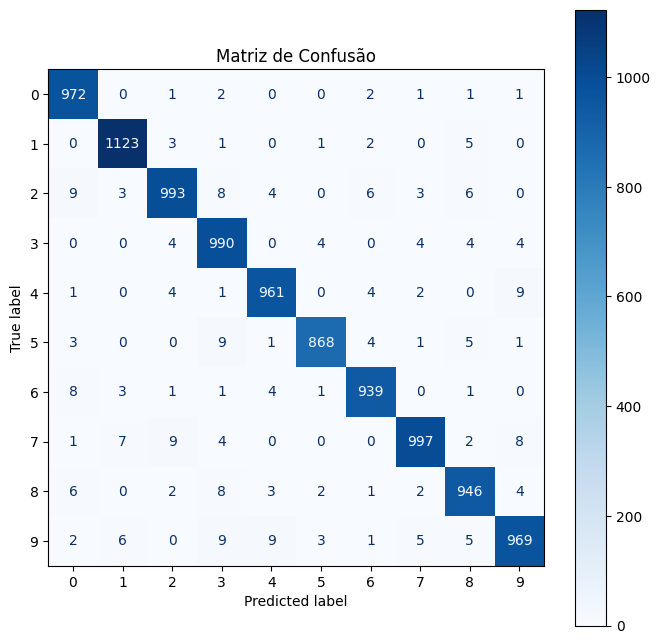

In [ ]:
# Precisamos obter todas as predições e rótulos do conjunto de teste
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Adiciona as predições e rótulos do lote às listas
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular a matriz de confusão usando o scikit-learn
cm = confusion_matrix(all_labels, all_preds)

# Exibir a matriz de confusão de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

## Vamos imprimir algumas imagens pra testar

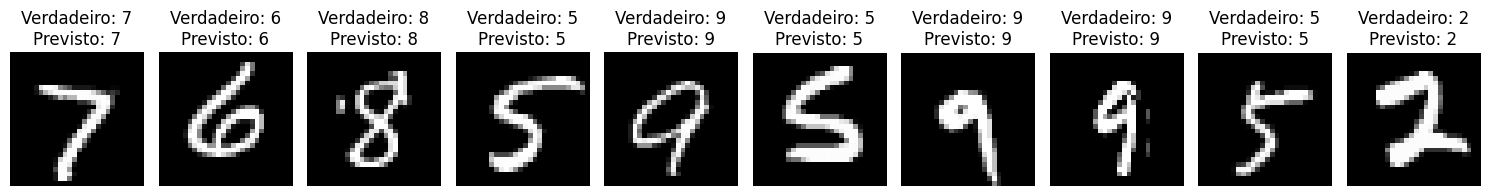

In [ ]:
# Exibir algumas imagens de teste com rótulos verdadeiros e previstos
model.eval()
with torch.no_grad():
    # Obter um batch aleatório de 10 imagens do conjunto de teste
    # Para obter um batch aleatório, podemos criar um DataLoader temporário
    # com shuffle=True e batch_size=10
    random_test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=True)
    images, labels = next(iter(random_test_loader))
    images, labels = images.to(device), labels.to(device)

    # Passar as imagens pela rede para obter previsões
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Visualizar algumas imagens com rótulos e previsões
    fig, axes = plt.subplots(1, 10, figsize=(15, 2)) # Ajusta para 10 subplots
    for i, ax in enumerate(axes):
        ax.imshow(images[i].cpu().squeeze(), cmap="gray")
        ax.set_title(f"Verdadeiro: {labels[i].item()}\nPrevisto: {predicted[i].item()}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()